<a href="https://colab.research.google.com/github/sidaye001/CS666_assignments/blob/main/%E2%80%9CCS666_Assignment_5_Sida_Ye_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

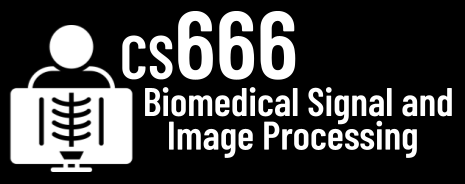
#Assignment 5

In [ ]:
# NAME:Sida Ye

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [5]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.6 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [3]:
# TODO: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

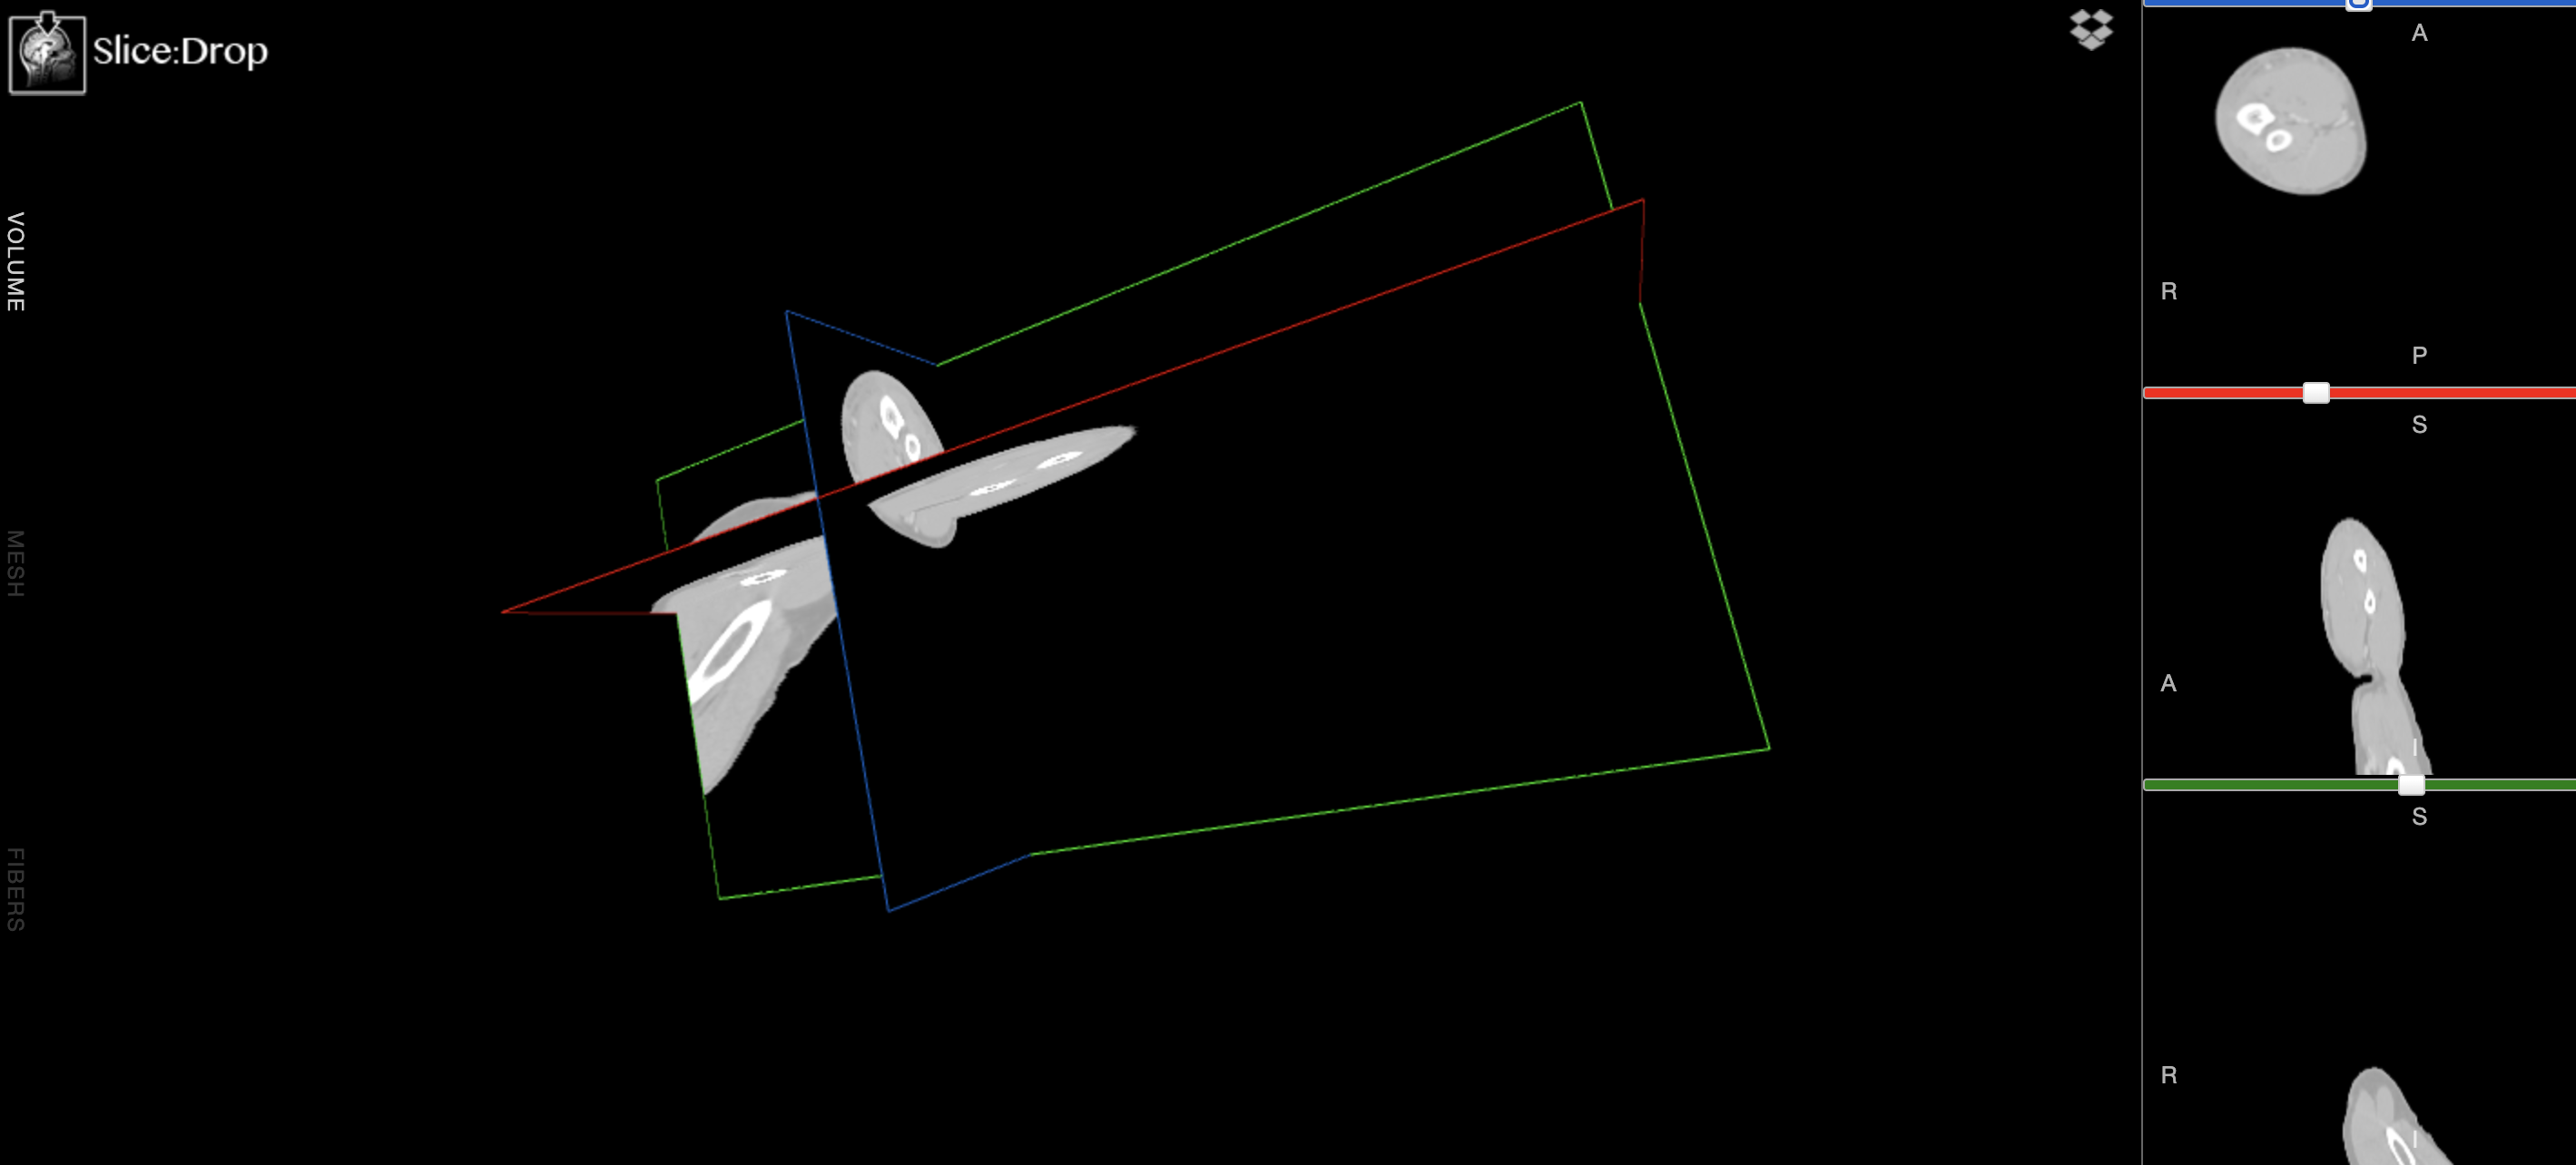

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

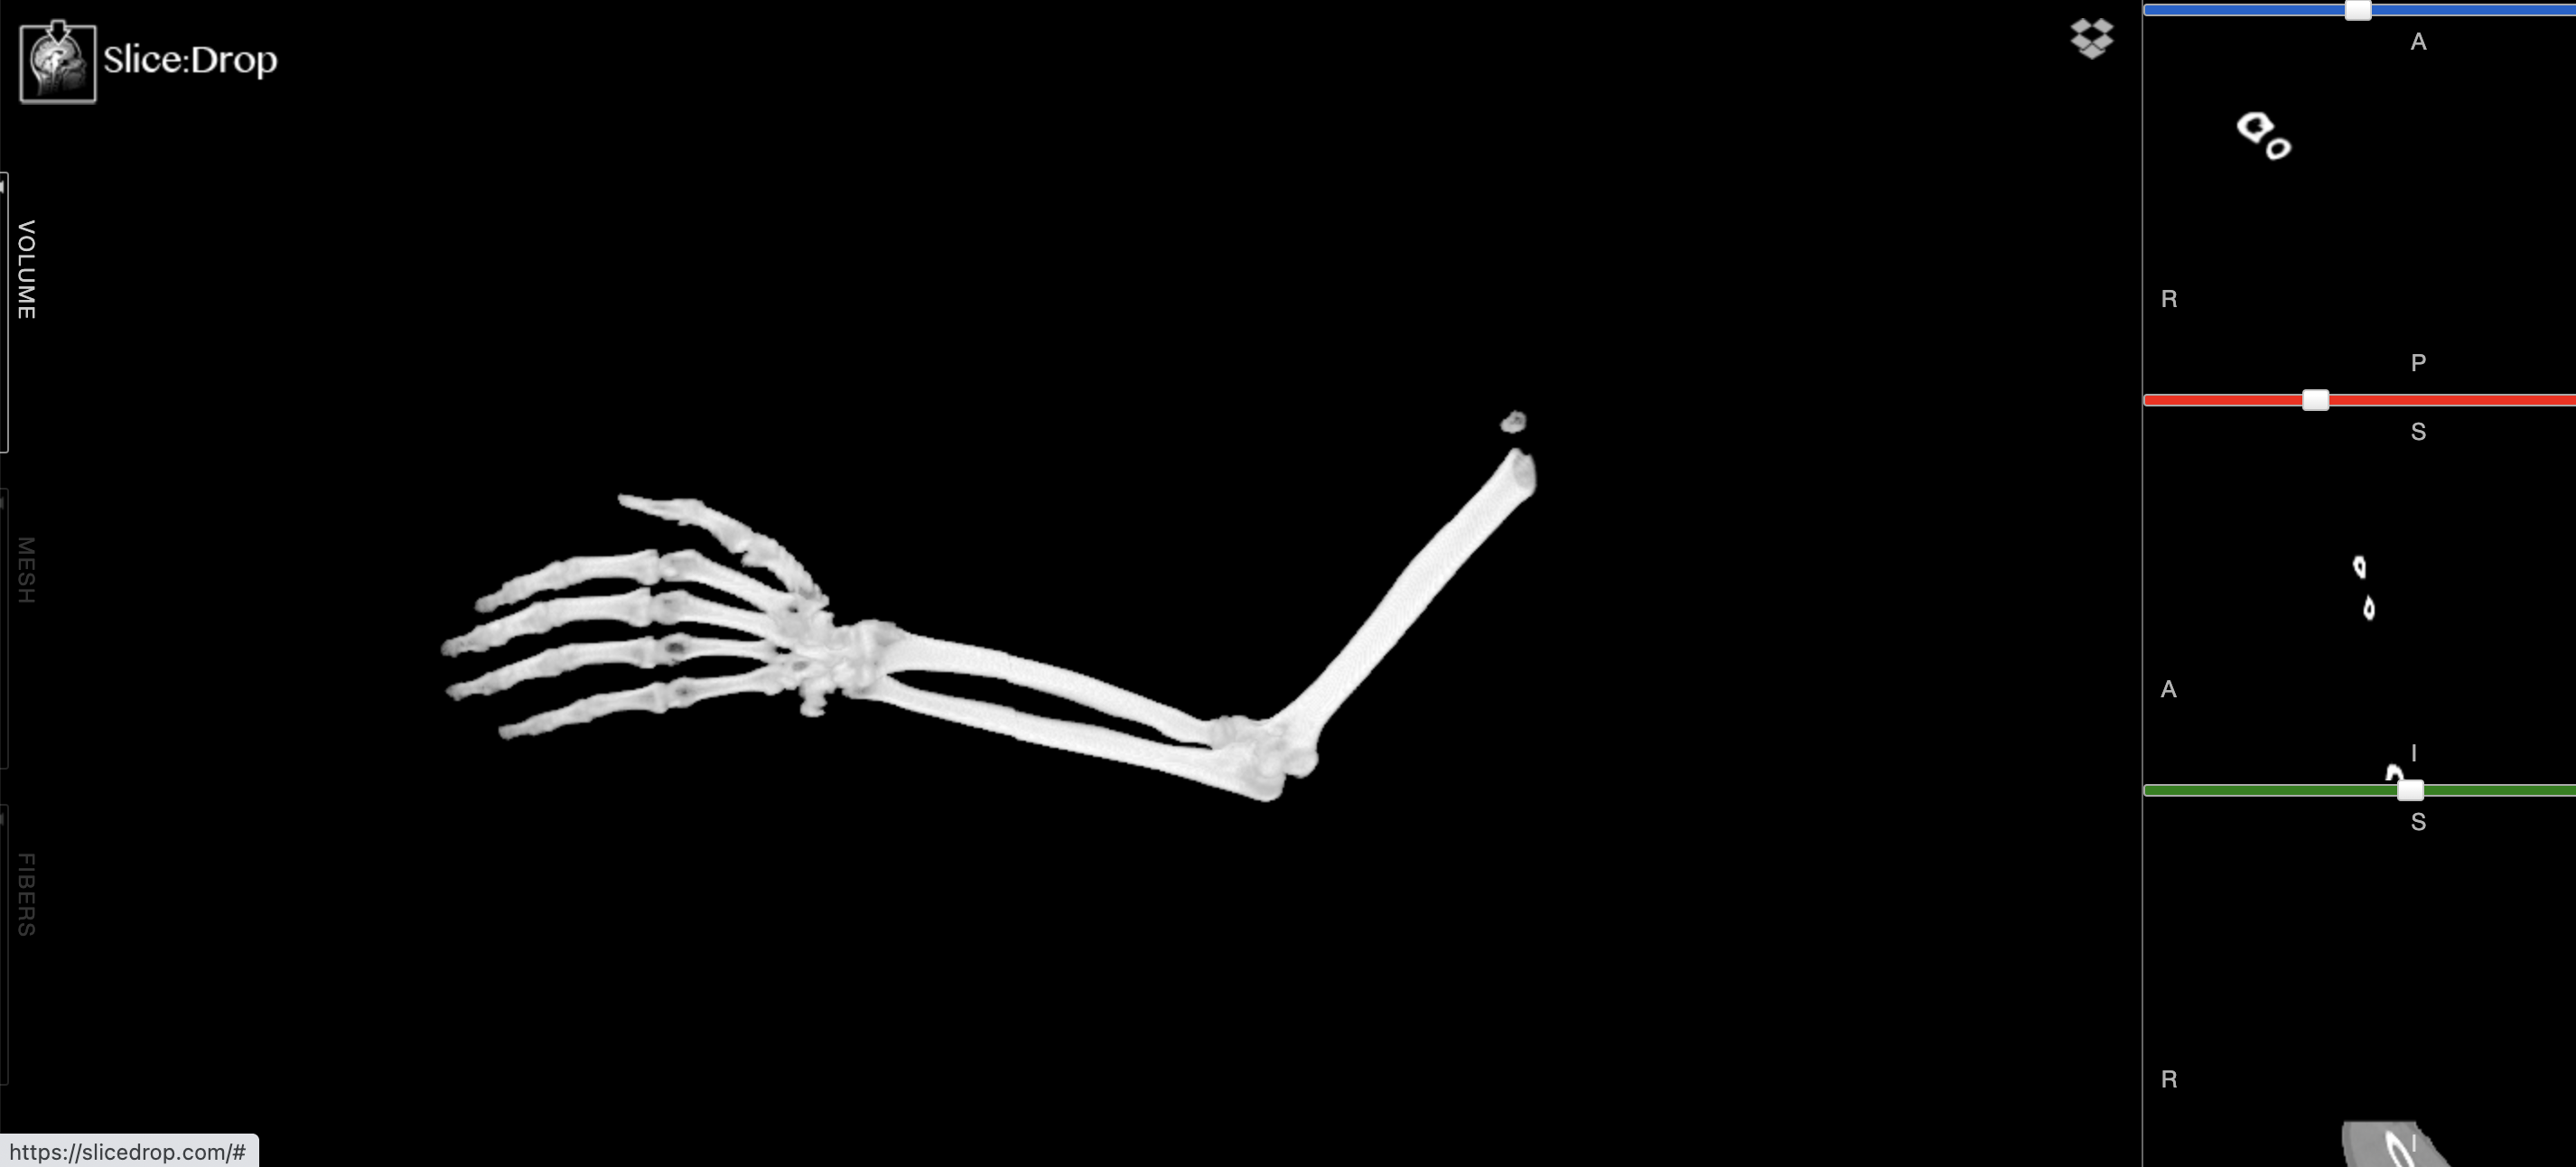

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [1]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [2]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [6]:
from pydicom import dcmread

In [99]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os
dir = './ct'
#os.listdir(DIR) gives a list of filenames
os.listdir(dir)

['IM-0001-0041.dcm',
 'IM-0001-0212.dcm',
 'IM-0001-0124.dcm',
 'IM-0001-0003.dcm',
 'IM-0001-0085.dcm',
 'IM-0001-0096.dcm',
 'IM-0001-0084.dcm',
 'IM-0001-0057.dcm',
 'IM-0001-0008.dcm',
 'IM-0001-0025.dcm',
 'IM-0001-0077.dcm',
 'IM-0001-0184.dcm',
 'IM-0001-0066.dcm',
 'IM-0001-0138.dcm',
 'IM-0001-0079.dcm',
 'IM-0001-0059.dcm',
 'IM-0001-0072.dcm',
 'IM-0001-0043.dcm',
 'IM-0001-0194.dcm',
 'IM-0001-0189.dcm',
 'IM-0001-0130.dcm',
 'IM-0001-0023.dcm',
 'IM-0001-0001.dcm',
 'IM-0001-0048.dcm',
 'IM-0001-0049.dcm',
 'IM-0001-0161.dcm',
 'IM-0001-0106.dcm',
 'IM-0001-0167.dcm',
 'IM-0001-0140.dcm',
 'IM-0001-0071.dcm',
 'IM-0001-0125.dcm',
 'IM-0001-0103.dcm',
 'IM-0001-0069.dcm',
 'IM-0001-0073.dcm',
 'IM-0001-0009.dcm',
 'IM-0001-0180.dcm',
 'IM-0001-0170.dcm',
 'IM-0001-0220.dcm',
 'IM-0001-0060.dcm',
 'IM-0001-0128.dcm',
 'IM-0001-0115.dcm',
 'IM-0001-0218.dcm',
 'IM-0001-0139.dcm',
 'IM-0001-0188.dcm',
 'IM-0001-0005.dcm',
 'IM-0001-0102.dcm',
 'IM-0001-0132.dcm',
 'IM-0001-019

In [100]:
files = [os.path.join(dir, f) for f in os.listdir(dir) if f.endswith('.dcm')]
#sorted them by slice location
files = sorted(files)
tmp = dcmread(files[0])
nrows = int(tmp.Rows)
ncols = int(tmp.Columns)
nslices = len(files)
print('number of rows=',nrows)
print('number of columns=',ncols)
print('number of slices=',nslices)

number of rows= 454
number of columns= 512
number of slices= 220


In [101]:
#creat an empty numpy array
all = np.zeros((nrows, ncols, nslices), dtype=np.float32)
#Loop through
for i, file_path in enumerate(files):
    ct_file = dcmread(file_path)
    all[:, :, i] = ct_file.pixel_array.astype(np.float32)


In [102]:
print(all.shape)

(454, 512, 220)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

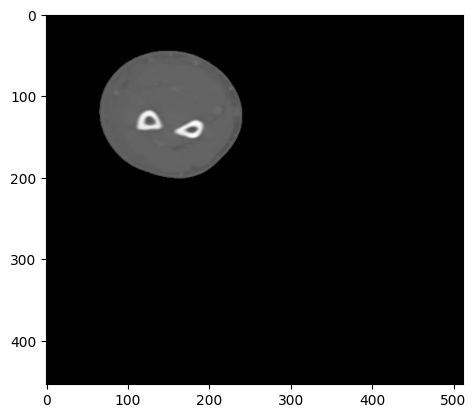

In [103]:
# TODO: YOUR CODE FOR AXIAL
axial = all[:, :, int(nslices/2)]
plt.imshow(axial, cmap='gray')
plt.show()

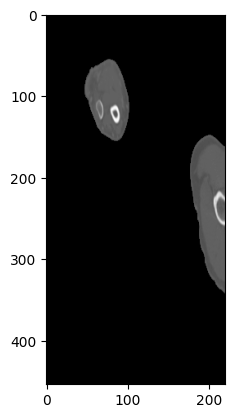

In [104]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = all[:, int(ncols/2), :]
plt.imshow(sagittal, cmap='gray')
plt.show()

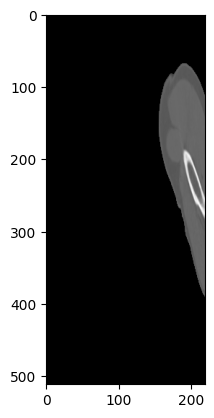

In [105]:
# TODO: YOUR CODE FOR CORONAL
coronal = all[int(nrows/2), :, :]
plt.imshow(coronal, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [106]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [107]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [76]:
ct_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189445.5142
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7238010.5.1.4.0.75157.1397189445.5142
(0008, 0020) Study Date                      

In [108]:
# TODO: YOUR CODE
window = ct_file.WindowWidth
level = ct_file.WindowCenter

print('Window=', window)
print('Level=', level)


Window= 410
Level= 30


In [109]:
Rescale_Intercept=ct_file['RescaleIntercept'].value
print('Rescale Intercept=', Rescale_Intercept)

Rescale Intercept= -1024


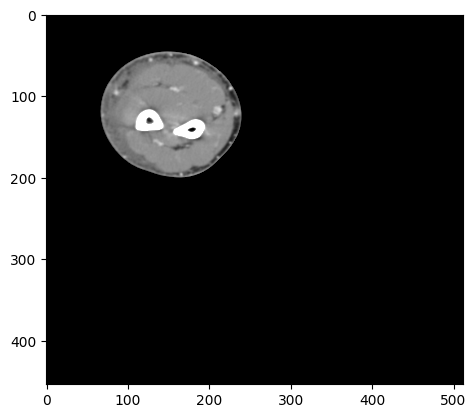

In [110]:
# To apply the Window/Level values
vmin = level - (window/2)
vmax = level + (window/2)
# Visualize one slice with window/level adjustment
plt.imshow(all[:, :, int(nslices/2)]+Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [111]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [121]:
# TODO: YOUR CODE
window = 2000
level = 600
print('Window=', window)
print('Level=', level)

Window= 2000
Level= 600


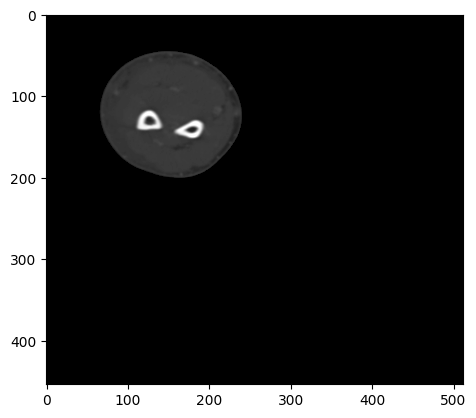

In [122]:
# To apply the Window/Level values
vmin = level - (window/2)
vmax = level + (window/2)
# Visualize one slice with window/level adjustment
plt.imshow(all[:, :, int(nslices/2)]+Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

Window= 300
Level= 60


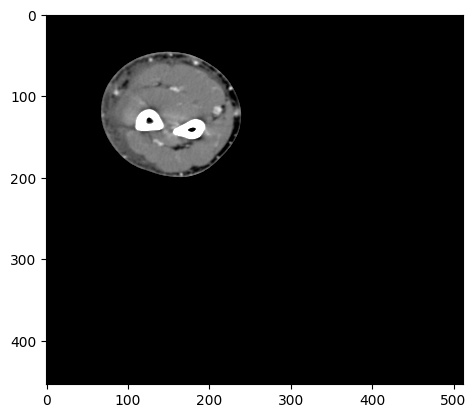

In [124]:
window = 300
level = 60
print('Window=', window)
print('Level=', level)
# To apply the Window/Level values
vmin = level - (window/2)
vmax = level + (window/2)
# Visualize one slice with window/level adjustment
plt.imshow(all[:, :, int(nslices/2)]+Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: the window value controls the contrast of the image and the level value controls 
# the brightness of the image.
# It seems that if that I change the values of window and level, the different values are
# suitable to different tissues. For example, I change the values as  "Window=2000, Level=800"
# The values are fitted to make bones more observable.
# However, if I change them into "300" and "50", then, it is good to observe the soft tissues.
# Two scenarios are showed above

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""